<a href="https://colab.research.google.com/github/shiroleshreya/projects/blob/main/AI_project_june23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [ ]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2023-06-07 16:29:07--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

loan_train.csv      100%[===================>]  22.56K  --.-KB/s    in 0.02s   

2023-06-07 16:29:07 (1.06 MB/s) - ‘loan_train.csv’ saved [23101/23101]



In [ ]:
df = pd.read_csv('loan_train.csv')
#df.head()
df

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male
...,...,...,...,...,...,...,...,...,...,...
341,394,394,COLLECTION,800,15,9/11/2016,9/25/2016,32,High School or Below,male
342,395,395,COLLECTION,1000,30,9/11/2016,10/10/2016,25,High School or Below,male
343,397,397,COLLECTION,800,15,9/12/2016,9/26/2016,39,college,male
344,398,398,COLLECTION,1000,30,9/12/2016,11/10/2016,28,college,male


In [ ]:
df.shape

(346, 10)

In [ ]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()


,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


In [ ]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

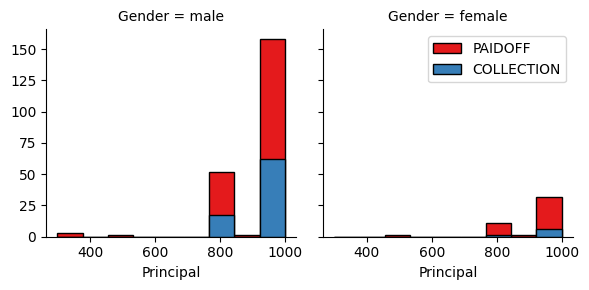

In [ ]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()


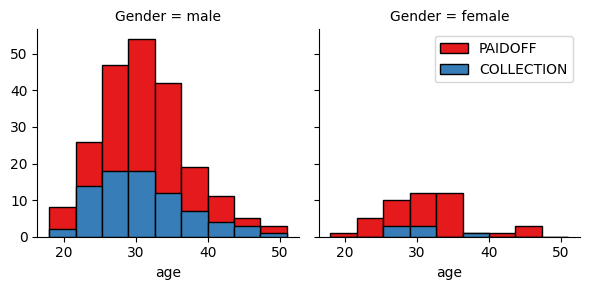

In [ ]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

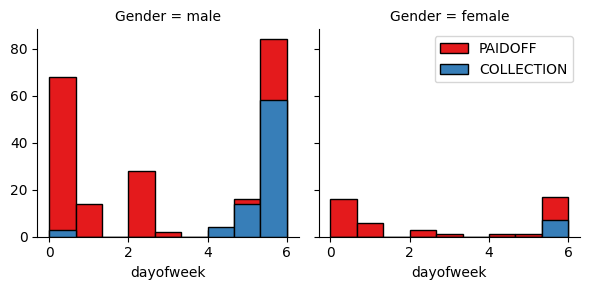

In [ ]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

In [ ]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


In [ ]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

In [ ]:
df['Gender'].replace(to_replace=['male', 'female'], value=[0 ,1],inplace=True)

In [ ]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

In [ ]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


In [ ]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


In [ ]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


In [ ]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [ ]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

#Splitting data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print()
print(X_train[0:5])

(276, 8) (70, 8) (276,) (70,)

[[ 0.51578458  0.92071769 -0.65321055 -0.42056004 -1.20577805 -0.38170062
   1.13639374 -0.86968108]
 [-1.31458942 -0.95911111  2.16570687  2.37778177  0.82934003 -0.38170062
   1.13639374 -0.86968108]
 [ 0.51578458  0.92071769 -0.15575453 -0.42056004 -1.20577805 -0.38170062
  -0.87997669  1.14984679]
 [-1.31458942 -0.95911111 -0.3215732  -0.42056004  0.82934003 -0.38170062
  -0.87997669  1.14984679]
 [ 0.51578458  0.92071769 -0.81902922  2.37778177  0.82934003 -0.38170062
  -0.87997669  1.14984679]]


In [ ]:
k=15
mean_acc = np.zeros((k-1))
std_acc=np.zeros((k-1))

for n in range(1,k):
    #Train Model and Predict
    neig = KNeighborsClassifier(n_neighbors =n).fit(X_train, y_train)
    yhat = neig.predict(X_test)
    mean_acc[n-1]=np.mean(yhat==y_test);

    #std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.67142857, 0.6       , 0.7       , 0.62857143, 0.71428571,
       0.68571429, 0.74285714, 0.75714286, 0.72857143, 0.72857143,
       0.77142857, 0.75714286, 0.78571429, 0.75714286])

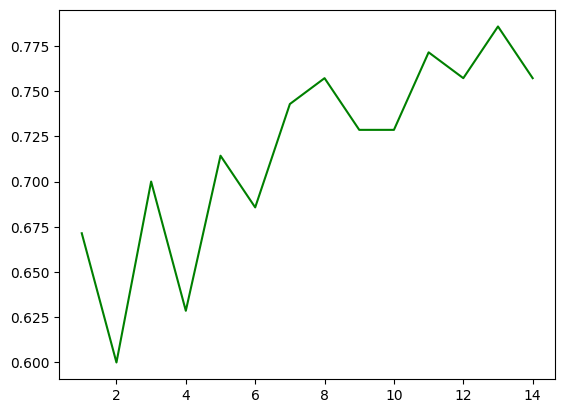

In [ ]:
#Plot model accuracy for Different number of Neighbors

plt.plot(range(1,k),mean_acc,'g')           #)           , mean_train, 'b')

In [ ]:
#print(confusion_matrix(y_test,yhat))

print(classification_report(y_test,yhat))

              precision    recall  f1-score   support

  COLLECTION       0.33      0.42      0.37        12
     PAIDOFF       0.87      0.83      0.85        58

    accuracy                           0.76        70
   macro avg       0.60      0.62      0.61        70
weighted avg       0.78      0.76      0.77        70



In [ ]:

yhat_prob = neig.predict(X_test)
mean_test = accuracy_score(y_test, yhat)
mean_train = accuracy_score(y_train, neig.predict(X_train))
print(mean_test)
print(mean_train)

0.7571428571428571
0.7608695652173914


DECISION TREE

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
k=10
mean_dec = np.zeros((k-1))

for n in range(1,k):
    #Train Model and Predict
    dectree = DecisionTreeClassifier(criterion="entropy", max_depth = 5)
    dectree.fit(X_train, y_train)
    yhat_dec = dectree.predict(X_test)
    mean_dec[n-1] = np.mean(yhat_dec==y_test)

mean_dec

array([0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8])

In [ ]:
#plt.plot(range(1,k),mean_dec,'g')

In [ ]:
dec_acc = accuracy_score(y_test, yhat_dec)
print( "The best accuracy was at", mean_dec.max(), "and max_depth of 3+1 =4")
print()
print(classification_report(y_test, yhat_dec))

The best accuracy was at 0.8 and max_depth of 3+1 =4

              precision    recall  f1-score   support

  COLLECTION       0.40      0.33      0.36        12
     PAIDOFF       0.87      0.90      0.88        58

    accuracy                           0.80        70
   macro avg       0.63      0.61      0.62        70
weighted avg       0.79      0.80      0.79        70



[Text(0.3375, 0.9166666666666666, 'x[4] <= -0.188\nentropy = 0.839\nsamples = 276\nvalue = [74, 202]'),
 Text(0.1, 0.75, 'x[7] <= 0.14\nentropy = 0.181\nsamples = 110\nvalue = [3, 107]'),
 Text(0.05, 0.5833333333333334, 'entropy = 0.0\nsamples = 67\nvalue = [0, 67]'),
 Text(0.15, 0.5833333333333334, 'x[2] <= -0.902\nentropy = 0.365\nsamples = 43\nvalue = [3, 40]'),
 Text(0.1, 0.4166666666666667, 'entropy = 0.0\nsamples = 8\nvalue = [0, 8]'),
 Text(0.2, 0.4166666666666667, 'x[2] <= -0.404\nentropy = 0.422\nsamples = 35\nvalue = [3, 32]'),
 Text(0.1, 0.25, 'x[1] <= -0.019\nentropy = 0.619\nsamples = 13\nvalue = [2, 11]'),
 Text(0.05, 0.08333333333333333, 'entropy = 0.0\nsamples = 8\nvalue = [0, 8]'),
 Text(0.15, 0.08333333333333333, 'entropy = 0.971\nsamples = 5\nvalue = [2, 3]'),
 Text(0.3, 0.25, 'x[2] <= 1.254\nentropy = 0.267\nsamples = 22\nvalue = [1, 21]'),
 Text(0.25, 0.08333333333333333, 'entropy = 0.0\nsamples = 16\nvalue = [0, 16]'),
 Text(0.35, 0.08333333333333333, 'entropy = 0

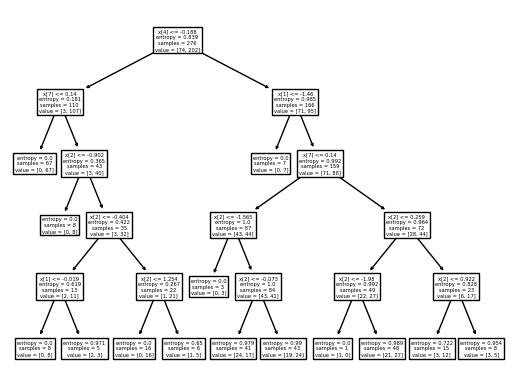

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt

tree.plot_tree(dectree)

In [ ]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [ ]:
import pandas as pd
test_df = pd.read_csv('loan_train.csv')

test_df.head()

test_df.shape

test_df['due_date'] = pd.to_datetime (df['due_date'])
test_df['effective_date'] = pd.to_datetime (df['effective_date'])

test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek

test_df['weekend' ] = test_df['dayofweek'].apply(lambda x: 1 if (x>3) else 0)
test_df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


In [ ]:
#Extract features

Feature = test_df [[ 'Principal', 'terms', 'age', 'Gender', 'weekend']]
Feature = pd.concat([Feature, pd.get_dummies (test_df['education'])], axis=1)
Feature.drop(['Master or Above'], axis= 1, inplace=True)

Feature.head()

#Convert string to numerical format

Feature['Gender'].replace(to_replace=['male', 'female'], value=[0,1], inplace=True)
Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


In [ ]:
f = Feature

y_test_set = test_df['loan_status'].values

X_test_set =preprocessing.StandardScaler().fit(f).transform(f)

print (X_test_set.shape)

print(y_test_set.shape)

(346, 8)
(346,)


In [ ]:
#KNN evaluation
from sklearn.neighbors import KNeighborsClassifier
y_hat_knn = neig.predict(X_test_set)

j_score_knn =jaccard_score(y_test_set,y_hat_knn, pos_label="PAIDOFF")

f1_score_knn =f1_score(y_test_set, y_hat_knn, pos_label="PAIDOFF")
print (j_score_knn)

print (f1_score_knn)

0.7296416938110749
0.8436911487758947


In [ ]:
#Decision Tree evaluation

y_hat_dt = dectree.predict(X_test_set)

j_score_dt = jaccard_score (y_test_set,y_hat_dt, pos_label="PAIDOFF")
f1_score_dt = f1_score (y_test_set, y_hat_dt, pos_label="PAIDOFF")

print(j_score_dt)

print (f1_score_dt)

0.7476340694006309
0.855595667870036


In [ ]:
report = {'Algorithm': ['KNN', 'Decision Tree'],
          'Jaccard': [j_score_knn,j_score_dt],
          'F1-Score':[f1_score_knn, f1_score_dt],
          'LogLoss': ['NA', 'NA']}

report_df = pd.DataFrame(report)

In [ ]:
print(report_df)

       Algorithm   Jaccard  F1-Score LogLoss
0            KNN  0.729642  0.843691      NA
1  Decision Tree  0.747634  0.855596      NA
